In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Statistical Methods/spambase.data', sep=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
columns = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",
           "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
           "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
           "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
           "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
           "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
           "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
           "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
           "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
           "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
           "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
           "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average",
           "capital_run_length_longest", "capital_run_length_total", "spam"]

In [4]:
df.columns = columns
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
df['spam'].value_counts()

0    2788
1    1813
Name: spam, dtype: int64

In [6]:
X = df.drop('spam', axis=1).values
Y = df['spam'].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Logistic Regression

In [8]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [9]:
model = LogisticRegression(random_state=42)
model.fit(x_train_sc, y_train)

LogisticRegression(random_state=42)

In [10]:
y_preds = model.predict(x_test_sc)
print(f"Classification Report:")
print(classification_report(y_test, y_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921



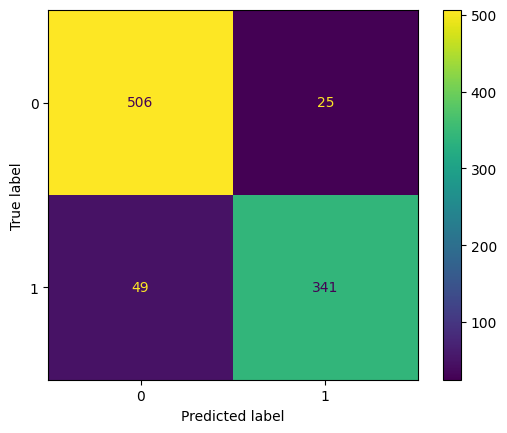

In [11]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

## With PCA

In [12]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

pca = PCA(random_state=42)

pca.fit(x_train_sc)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

pca_results = pd.DataFrame({
    "component": [i+1 for i in range(0, len(cum_var_exp))],
    "cumulative_variance": [var for var in cum_var_exp]
})

exp_var_threshold = 0.8

valid_pca_results = pca_results[pca_results['cumulative_variance'] > exp_var_threshold]

print(f"Components with cumulative variance over threshold of {exp_var_threshold}")
valid_pca_results.head()

Components with cumulative variance over threshold of 0.8


,component,cumulative_variance
34,35,0.810410
35,36,0.823572
36,37,0.836541
37,38,0.849194
38,39,0.861612


In [13]:
n_components = int(valid_pca_results.iloc[0]["component"])
print(f"Selected components: {n_components}")

Selected components: 35


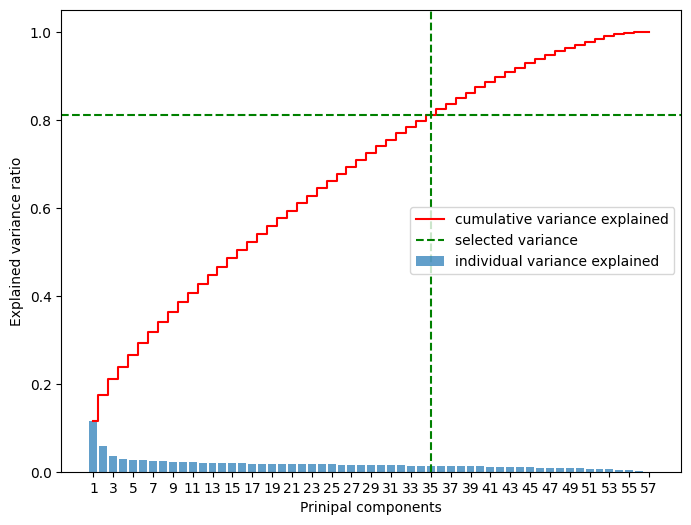

In [14]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cum_var_exp) + 1), var_exp, align="center", label="individual variance explained", alpha=0.7)
plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where="mid", label="cumulative variance explained", color="red")
plt.ylabel("Explained variance ratio")
plt.xlabel("Prinipal components")
plt.xticks(np.arange(1, len(var_exp) + 1, 2))

plt.axhline(y=valid_pca_results.iloc[0]["cumulative_variance"], color='g', linestyle='--', label="selected variance")
plt.axvline(x=n_components, color='g', linestyle='--')

plt.legend(loc="center right")

plt.show()

In [15]:
pca = PCA(n_components=n_components, random_state=42)
x_train_pca = pca.fit_transform(x_train_sc)
x_test_pca = pca.transform(x_test_sc)

In [16]:
model = LogisticRegression(random_state=42)
model.fit(x_train_pca, y_train)

LogisticRegression(random_state=42)

In [17]:
y_preds = model.predict(x_test_pca)
print(f"Classification Report:")
print(classification_report(y_test, y_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       531
           1       0.93      0.83      0.87       390

    accuracy                           0.90       921
   macro avg       0.91      0.89      0.90       921
weighted avg       0.90      0.90      0.90       921



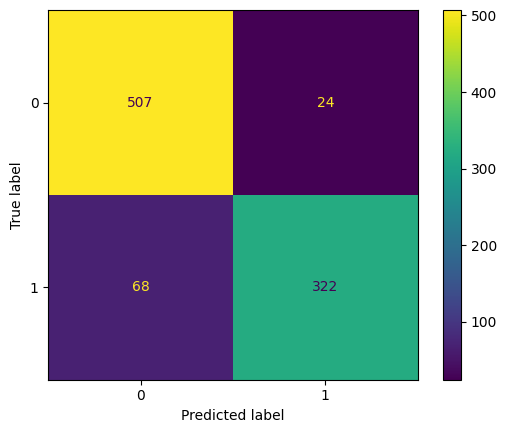

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

## GridSearch and KFold

In [20]:
sc = StandardScaler()
pca = PCA(random_state=42)
model = LogisticRegression(max_iter=10000, tol=0.1, random_state=42)

steps = [
    ("scaler", sc),
    ("pca", pca),
    ("model", model)
]

pipe = Pipeline(steps)

folds = KFold(n_splits=5, shuffle=True, random_state=42)

params = {
    "pca__n_components": [30, 35, 40, 45],
    "model__C": [0.1, 1, 10, 100, 1000]
}

In [21]:
search = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    cv=folds,
    scoring="accuracy",
    verbose=3,
    return_train_score=True
  )

search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END model__C=0.1, pca__n_components=30;, score=(train=0.911, test=0.912) total time=   0.2s
[CV 2/5] END model__C=0.1, pca__n_components=30;, score=(train=0.907, test=0.906) total time=   0.2s
[CV 3/5] END model__C=0.1, pca__n_components=30;, score=(train=0.907, test=0.906) total time=   0.1s
[CV 4/5] END model__C=0.1, pca__n_components=30;, score=(train=0.911, test=0.895) total time=   0.2s
[CV 5/5] END model__C=0.1, pca__n_components=30;, score=(train=0.908, test=0.901) total time=   0.2s
[CV 1/5] END model__C=0.1, pca__n_components=35;, score=(train=0.911, test=0.910) total time=   0.1s
[CV 2/5] END model__C=0.1, pca__n_components=35;, score=(train=0.905, test=0.908) total time=   0.1s
[CV 3/5] END model__C=0.1, pca__n_components=35;, score=(train=0.907, test=0.910) total time=   0.2s
[CV 4/5] END model__C=0.1, pca__n_components=35;, score=(train=0.912, test=0.893) total time=   0.2s
[CV 5/5] END model__C=0.1, pc

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(random_state=42)),
                                       ('model',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=42,
                                                           tol=0.1))]),
             param_grid={'model__C': [0.1, 1, 10, 100, 1000],
                         'pca__n_components': [30, 35, 40, 45]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [22]:
best_score = search.best_score_
best_C = search.best_params_["model__C"]
best_n_components = search.best_params_["pca__n_components"]

print(f"The highest test accuracy is {best_score} at C = {best_C}, n_components = {best_n_components}")

The highest test accuracy is 0.9211956521739131 at C = 100, n_components = 45


In [31]:
sc = StandardScaler()
best_pca = PCA(n_components=best_n_components, random_state=42)
best_model = LogisticRegression(max_iter=10000, tol=0.1, C=best_C, random_state=42)

x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)
joblib.dump(sc, 'scaler.joblib')

x_train_pca = best_pca.fit_transform(x_train_sc)
x_test_pca = best_pca.transform(x_test_sc)
joblib.dump(best_pca, 'best_pca.joblib')

best_model.fit(x_train_pca, y_train)
joblib.dump(best_model, 'best_model.joblib')

['best_model.joblib']

In [32]:
y_preds = best_model.predict(x_test_pca)
print(f"Classification Report:")
print(classification_report(y_test, y_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.91       921
weighted avg       0.92      0.92      0.92       921



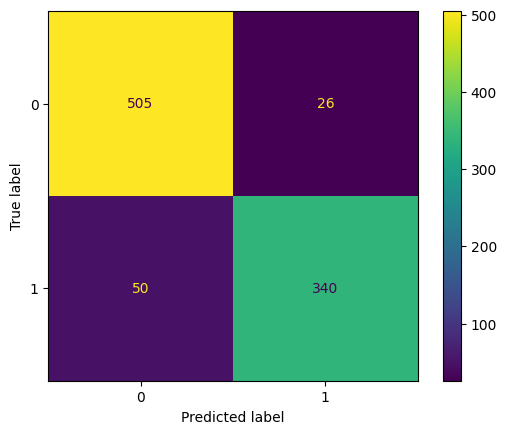

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)